<a href="https://colab.research.google.com/github/agkabir/SocialDataVisualization/blob/main/FirstAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from scipy.stats import gaussian_kde
import scipy as sp
import random
import folium
from folium import plugins
from folium.plugins import HeatMap
import warnings
warnings.filterwarnings('ignore')

In [2]:
# mounting of google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/My Drive/data/Police_report_2003_to_May_2018.csv')
focuscrimes = list(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

# Part 1: Temporal Patterns

**Exercise:** More temporal patterns. During week 1, we plotted some crime development over time (how each of the focus-crimes changed over time, year-by-year). In this exercise, please generate the visualizations described below.

1. Weekly patterns. Basically, we'll forget about the yearly variation and just count up what happens during each weekday. Here's what my version looks like. Some things make sense - for example drunkenness and the weekend. But there are some aspects that were surprising to me. Check out prostitution and mid-week behavior, for example!?

2. The months. We can also check if some months are worse by counting up number of crimes in Jan, Feb, ..., Dec. Did you see any surprises there?
The 24 hour cycle. We'll can also forget about weekday and simply count up the number of each crime-type that occurs in the entire dataset from midnight to 1am, 1am - 2am ... and so on. Again: Give me a couple of comments on what you see.

3. Hours of the week. But by looking at just 24 hours, we may be missing some important trends that can be modulated by week-day, so let's also check out the 168 hours of the week. So let's see the number of each crime-type Monday night from midninght to 1am, Monday night from 1am-2am - all the way to Sunday night from 11pm to midnight.

In [4]:
data['DateTime'] = pd.to_datetime(data['Date'].str[0:10]+' '+data['Time'], format = '%m/%d/%Y %H:%M',infer_datetime_format=True)
data['Month'] = data['DateTime'].dt.month
data['Hour'] = data['DateTime'].dt.hour
data['Week'] = data['DateTime'].dt.week
data['Weekday'] = data['DateTime'].dt.weekday
data['Weekhour'] = data['Hour'] + data['Weekday']*24

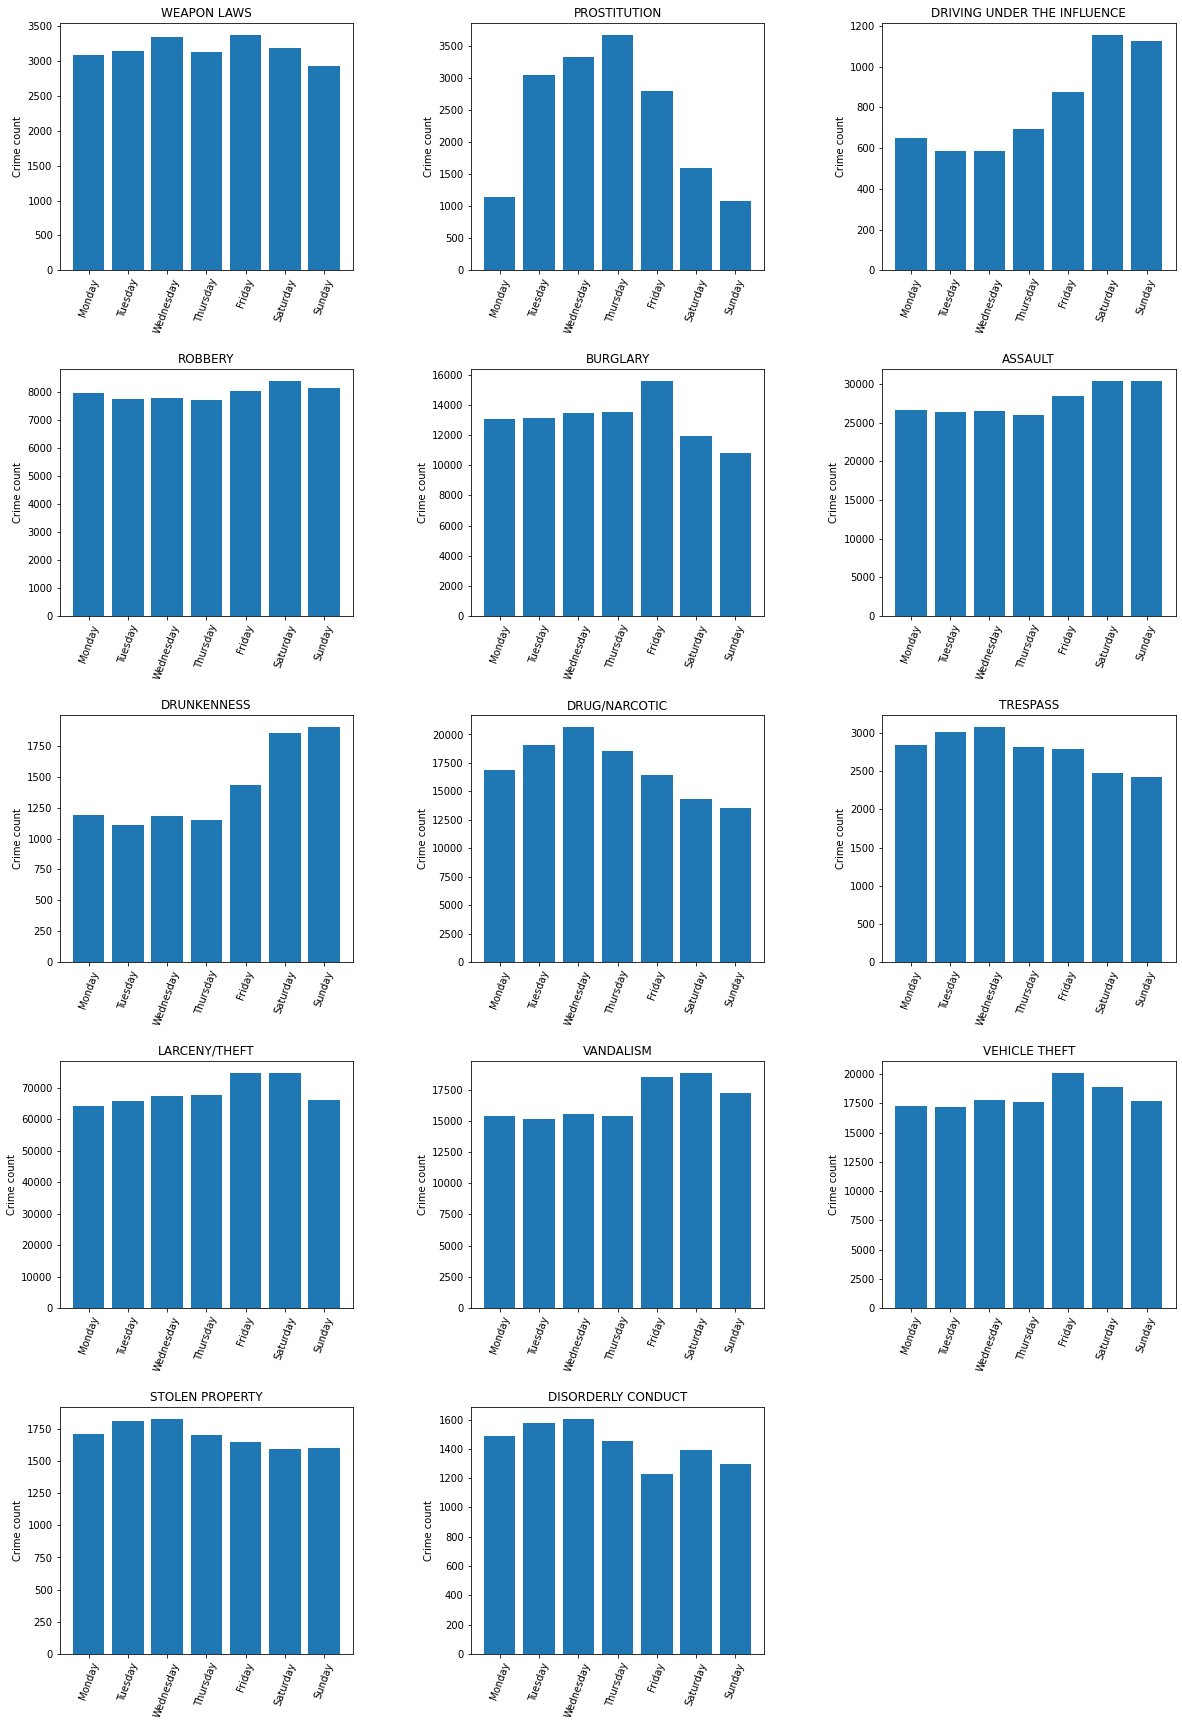

In [5]:
# 1.  Weekly patterns
focusedcrime_df = data[data.Category.isin(focuscrimes)] # Splitting the dataset by focus crime
count_by_week_and_focuscrimes = focusedcrime_df.groupby(['Category','DayOfWeek']).size() # Count the data points grouped by category and daysofweek
data_df_focus = count_by_week_and_focuscrimes.unstack()

fig = plt.figure(figsize = (20,30))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)
subplot_no = 0
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
for i in focuscrimes:
    subplot_no +=1
    fig.add_subplot(5,3, subplot_no)
    values = data_df_focus.loc[(i,days)]
    plt.bar(days, values)
    plt.ylabel('Crime count')
    plt.title(i)
    plt.xticks(rotation=70)

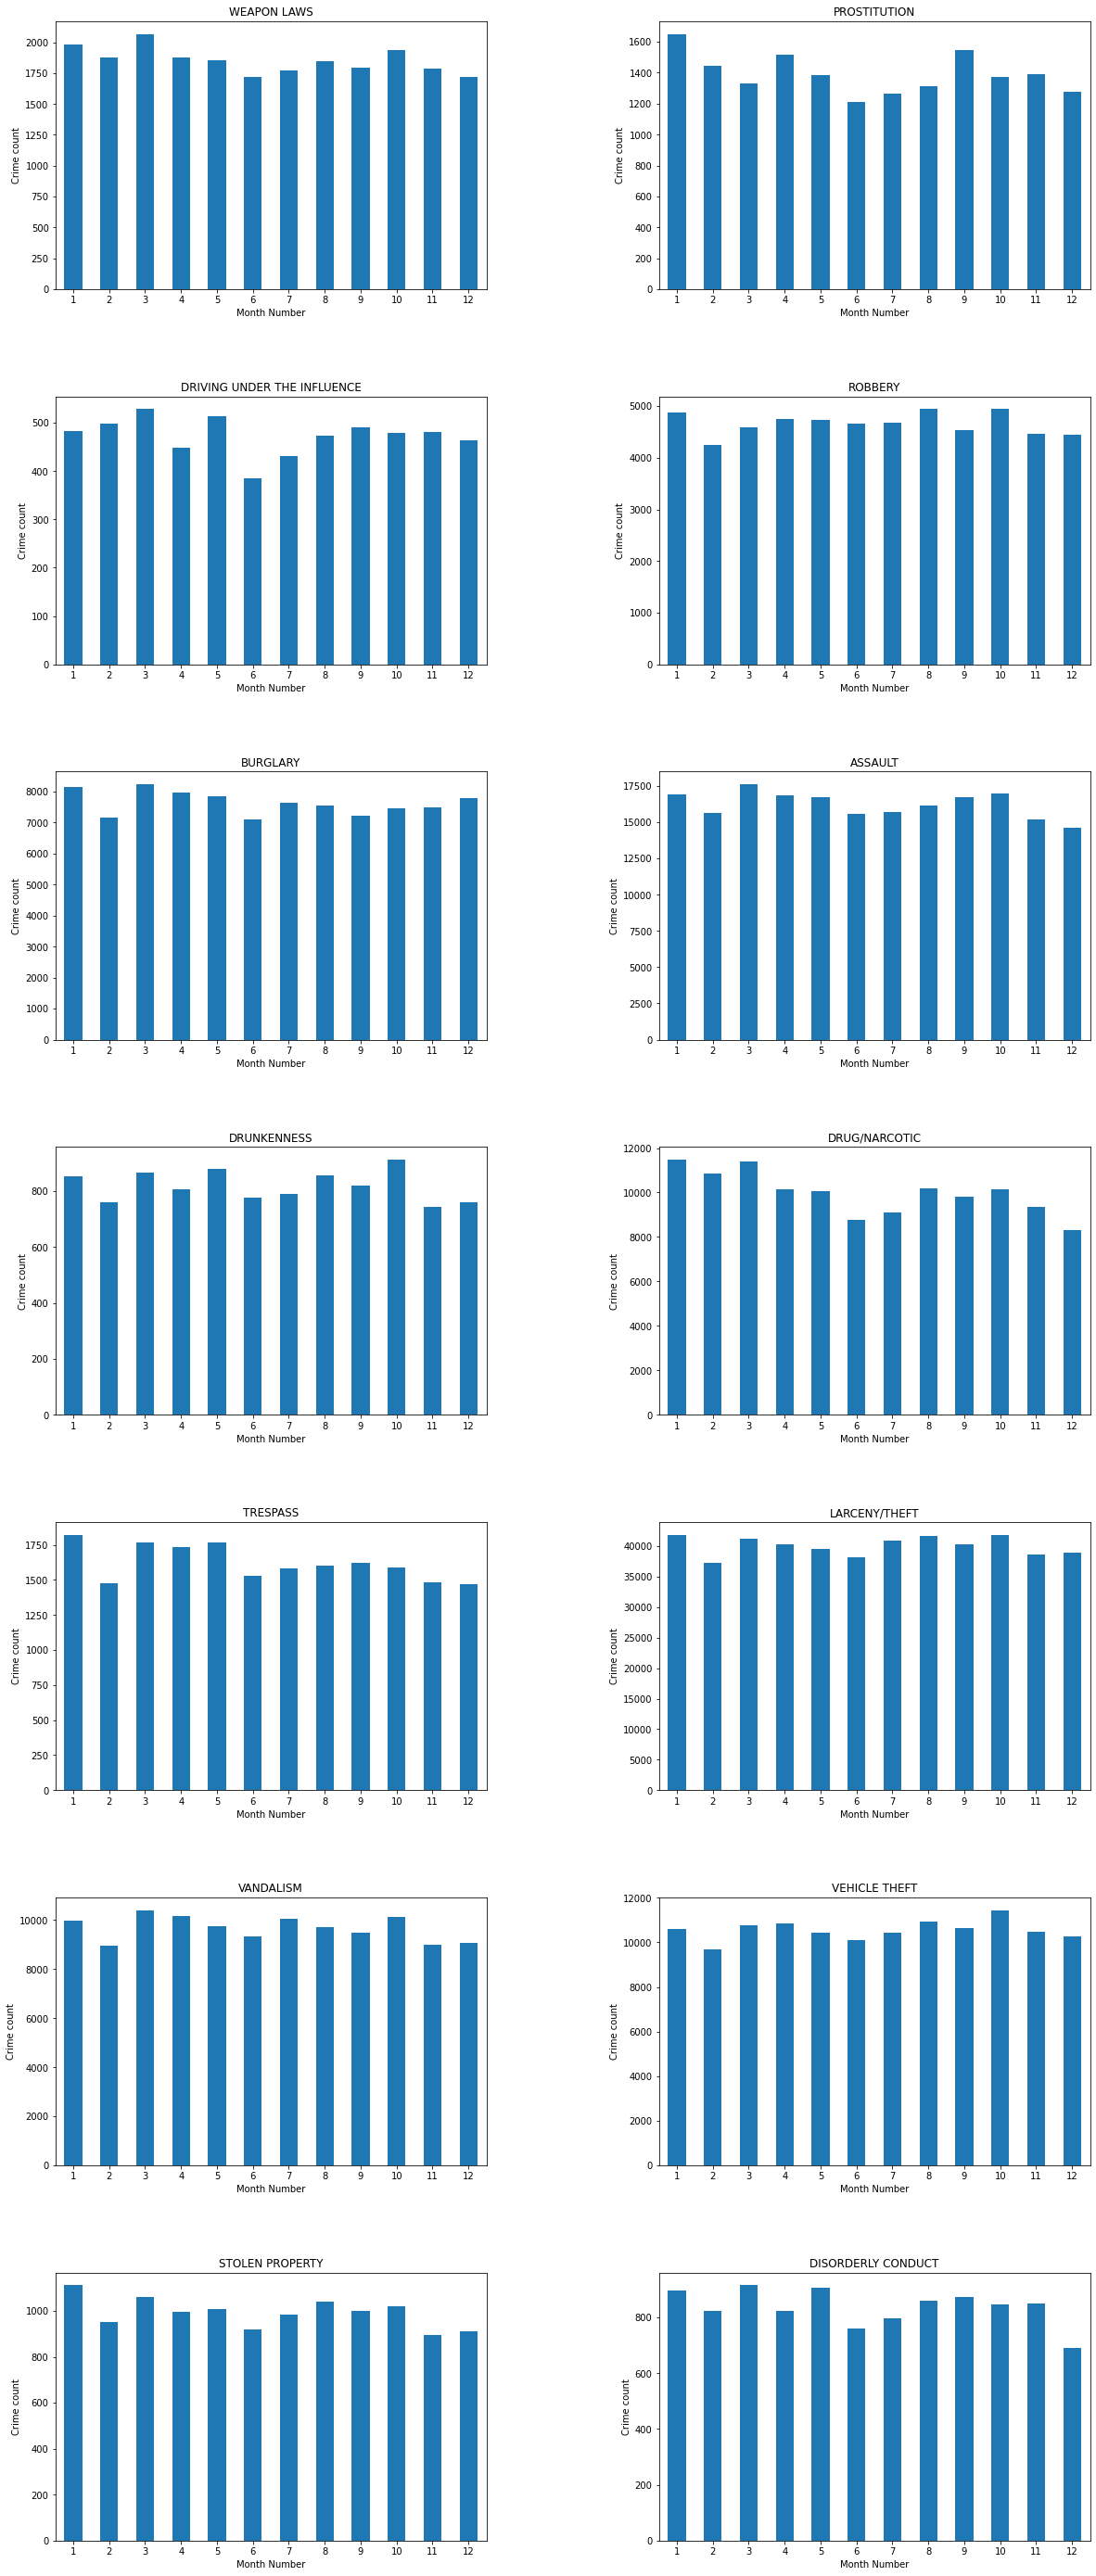

In [7]:
# 2. Monthly patterns
grouped_by_cat_month = focusedcrime_df.groupby(['Category','Month']).count()['IncidntNum']

fig = plt.figure(figsize = (20,50))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)
subplot_no = 0

for i in focuscrimes:
    subplot_no +=1
    fig.add_subplot(7,2, subplot_no)
    values = grouped_by_cat_month.loc[i]
    values.plot(kind = 'bar')
    plt.ylabel('Crime count')
    plt.xlabel('Month Number')
    plt.xticks(rotation=0)
    plt.title(i)

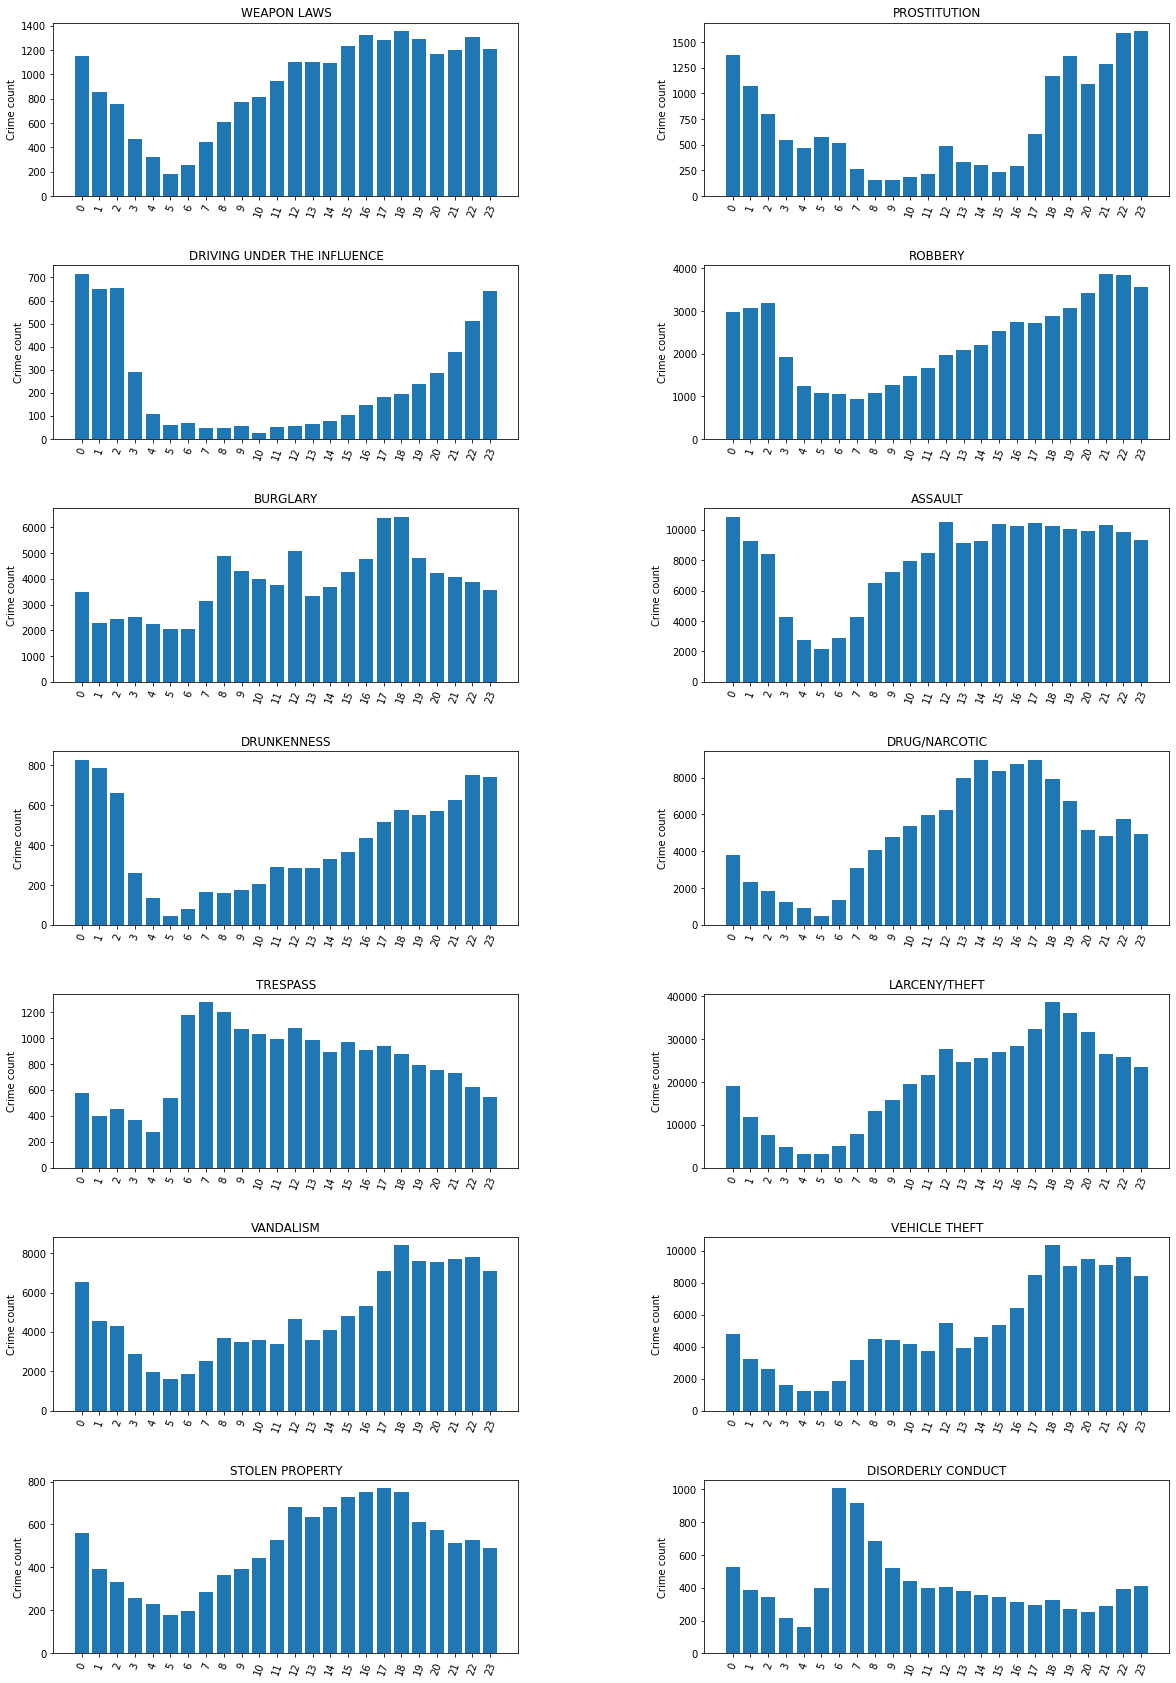

In [8]:
# 3. Hourly patterns
count_by_hour_and_focuscrimes = focusedcrime_df.groupby(['Category','Hour']).count()['IncidntNum']

fig = plt.figure(figsize = (20,30))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)
subplot_no = 0
hours_list = list(range(0,24))
for i in focuscrimes:
    subplot_no +=1
    fig.add_subplot(7,2, subplot_no)
    values = count_by_hour_and_focuscrimes.loc[(i,hours_list)]
    plt.bar(hours_list, values)
    plt.ylabel('Crime count')
    plt.xticks(hours_list, rotation=70)
    plt.title(i)

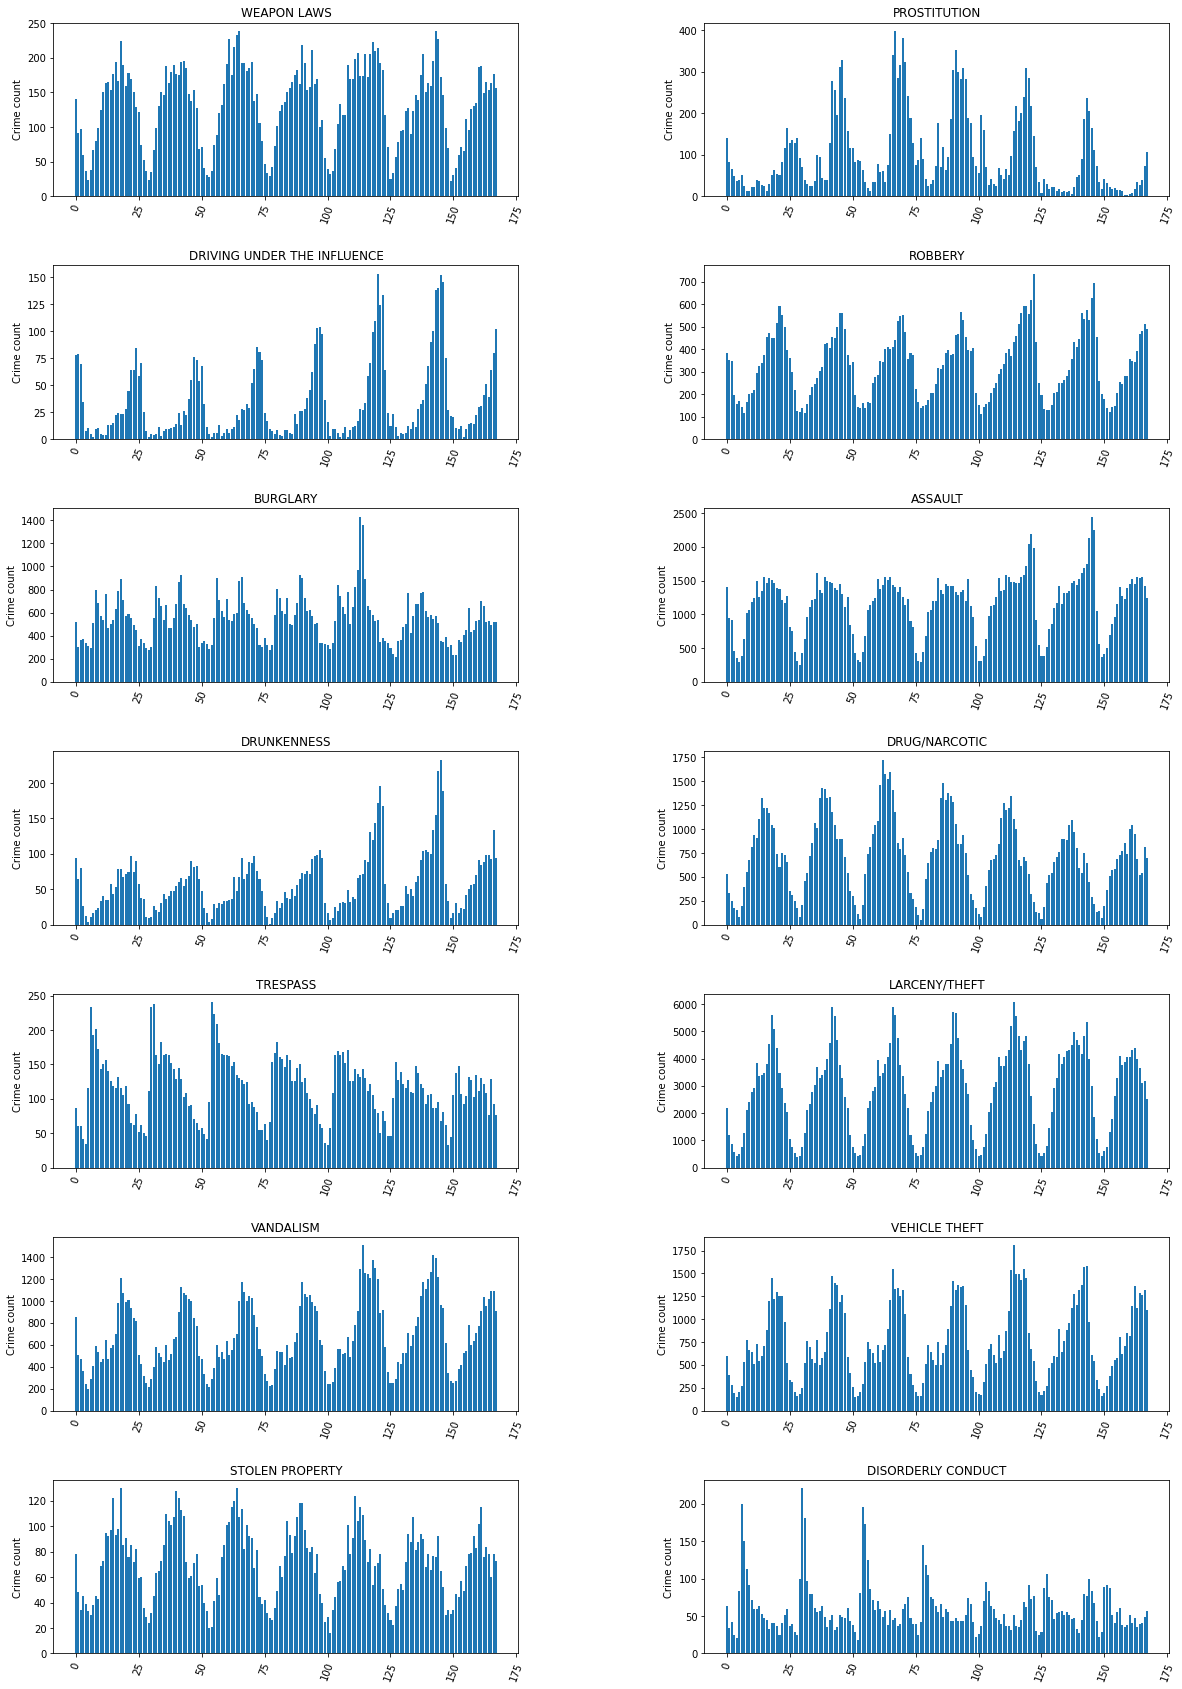

In [9]:
# 4. Hours of the week patterns
count_by_weekhour_and_focuscrimes = focusedcrime_df.groupby(['Category','Weekhour']).count()['IncidntNum']

fig = plt.figure(figsize = (20,30))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)
subplot_no = 0
week_hours = list(range(0,168))
for i in focuscrimes:
    subplot_no +=1
    fig.add_subplot(7,2, subplot_no)
    values = count_by_weekhour_and_focuscrimes.loc[(i,week_hours)]
    plt.bar(week_hours, values)
    plt.ylabel('Crime count')
    plt.title(i)
    plt.xticks(rotation=70)

# Part 2: Thinking about data and visualization

Questions for first video lecture:

1. What is the difference between data and metadata? How does that relate to the bike-example?

2. Sune says that the human eye is a great tool for data analysis. Do you agree? Explain why/why not. Mention something that the human eye is very good at. Can you think of something that is difficult for the human eye. Explain why your example is difficult.

3. Simpson's paradox is hard to explain. Come up with your own example - or find one on line.

4. In your own words, explain the difference between exploratory and explanatory data analysis.

Questions for second video lecture:

1. As mentioned earlier, visualization is not the only way to test for correlation. We can (for example) calculate the Pearson correlation. Explain in your own words how the Pearson correlation works and write down it's mathematical formulation. Can you think of an example where it fails (and visualization works)?

2. What is the difference between a bar-chart and a histogram?

3. I mention in the video that it's important to choose the right bin-size in histograms. But how do you do that? Do a Google search to find a criterion you like and explain it.


# Answers to part 2

**First video lecture**

1. Metadata is the information about the data. For example when it was recorded and what file format. Data can be anykind of information while metadata is the data about the data.

2. We agree that it's a good tool for data analysis but it depends on how the data is represented. For example humans are better at comparing distances then areas. [1]
An example when the human eye fails can be found in [1] when the plot of a kernel density function is compared to accumulative distribution function. In this case it is easy to believe that most of the data is distributed at the beginning of the x axis because of the height of the densitity function when in fact this is not true.  
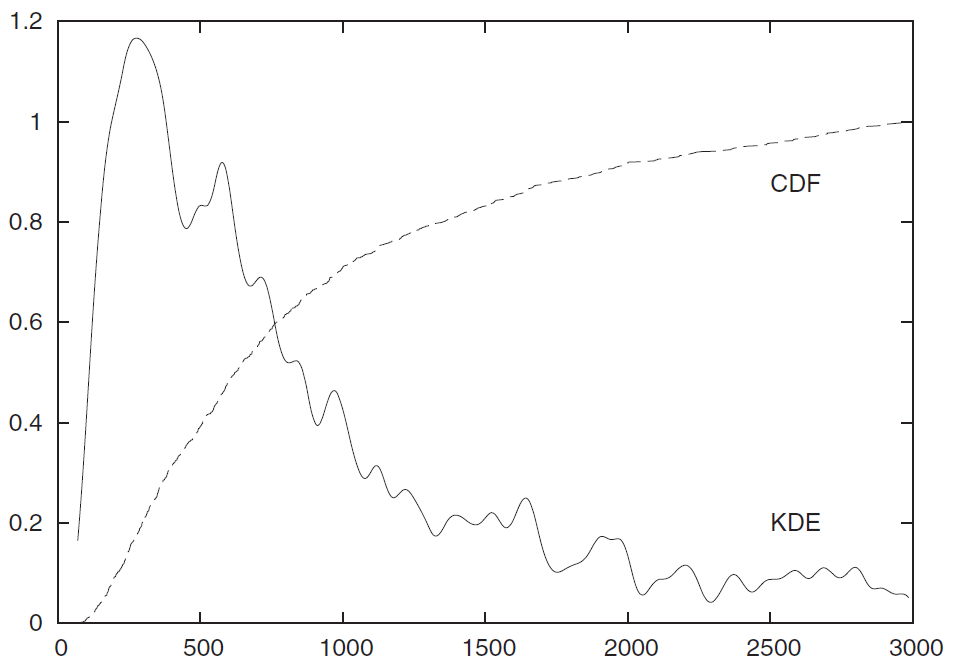

3. We found an example of the Simpsons paradox on Brilliant.org
https://brilliant.org/wiki/simpsons-paradox/

![alt text](https://ds055uzetaobb.cloudfront.net/brioche/uploads/wTYs7N2t0j-image-1.png?width=2400)

In this example it could appear that "Your friend" had a better answering rate over the two days, but this is not the case when the days are combined.

4. In exploratory visualization the researcher investigates the data. The investigator tries to find trends or get an intuition for the data. In explanatory data analysis the data has already been explored and conclusions have been drawn, these conclusion are then to be communicated to someone else.


**Second video lecture**

1. The correlation can range from -1 ot 1. The closer it is to 1 the more directly correlated both variables are, while the closer it is to -1 the more inversly correlated they are. Values close to 0 mean that there is no correlation between the variables.
$$\rho_{x,y} = \frac{cov(X, Y)}{\sigma_x \cdot \sigma_y} $$
Where $cov(X, Y)$ is the covariance between x and y and $\sigma$ is the standard deviation of each variable.

An example where the Pearson's correlation might be misleading is the Anscombe's quartet:
![alt text](https://upload.wikimedia.org/wikipedia/commons/e/ec/Anscombe%27s_quartet_3.svg)
All of these sets of data points have the same statistical properties, yet it is evidente that they are nothing alike.

2. A bar chart plots a bin for every instance or category while a histogram plots a distribution. A bin in a histogram can contain several instances or categories.

3. We could use Scott's rule:
$$w = \frac{3.5\sigma}{\sqrt[3]{n}} $$
Where $\sigma$ is the standard deviation of the dataset and $n$ is the size of the dataset.

[1] Data Analysis with Open Source Tools

# Part 3: Generating important plot types
1. First, let's make a jitter-plot (that is, code up something like Figure 2-1 from DAOST from scratch), but based on SF Police data. My hunch from inspecting the file is that the police-folks might be a little bit lazy in noting down the exact time down to the second. So choose a crime-type and a suitable time interval (somewhere between a month and 6 months depending on the crime-type) and create a jitter plot of the arrest times during a single hour (like 13-14, for example). So let time run on the $x$-axis and create vertical jitter.

2. Now for some histograms (please create a crime-data based versions of the plot-type shown in DAOST Figure 2-2). (I think the GPS data could be fun to understand from this perspective.)
This time, pick two crime-types with different geographical patterns and a suitable time-interval for each (you want between 1000 and 10000 points in your histogram)
Then take the latitude part of the GPS coordinates for each crime and bin the latitudes so that you have around 50 bins across the city of SF. You can use your favorite method for binning. I like numpy.histogram. This function gives you the counts and then you do your own plotting.

3. Next up is using the plot-type shown in Figure 2-4 from DAOST, but with the data you used to create Figure 2.1. To create the kernel density plot, you can either use gaussian_kde from scipy.stats (for an example, check out this stackoverflow post) or you can use seaborn.kdeplot.

4. Finally, grab 25 random timepoints from the dataset (of 1000-10000 original data) you've just plotted and create a version of Figure 2-4 based on the 25 data points. Does this shed light on why I think KDEs can bee misleading?

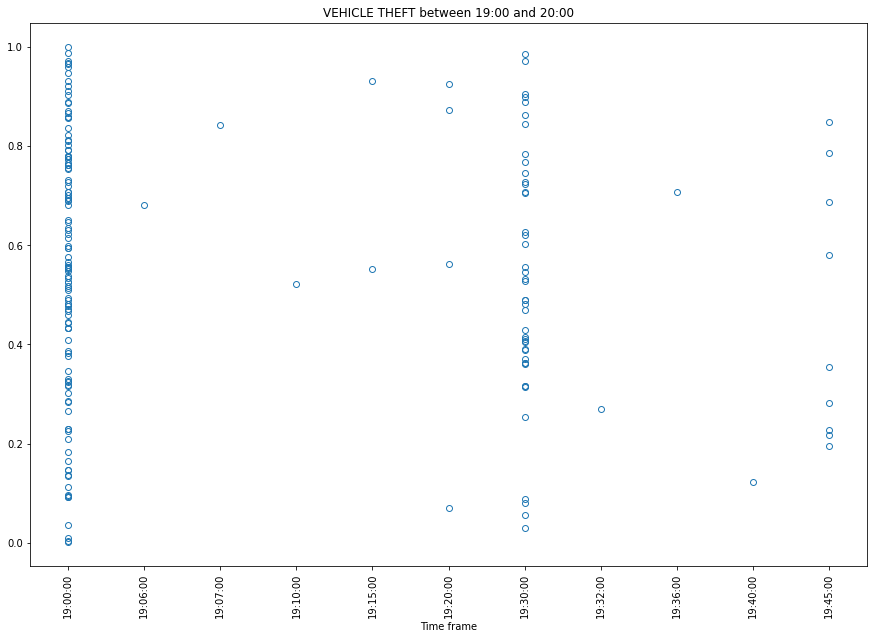

In [10]:
# 1. A jitter plot for the category 'VEHICLE THEFT', in the time frame 2009-3-1 19:00 to 2009-9-1 20:00
startdate = datetime(2009, 3, 1, 19)
enddate = datetime(2009, 9, 1, 20)
crime = focuscrimes[11]
#Filtering data that matches the selected category and the time frame (i.e. startdate and enddate)
tof = data[(data['DateTime'].dt.hour == startdate.hour) & (data['DateTime'] < enddate) & (data['DateTime'] > startdate) & (data['Category'] == crime)]
arrest_time = tof['DateTime'].dt.time
arrest_time_str = np.sort(arrest_time.apply(str)) # Converting to string format to plot
y = np.random.uniform(size = len(arrest_time)) # List of random numbers 

plt.figure(figsize = (15,10))
plt.plot(arrest_time_str,y,lw = 0, marker = 'o',fillstyle='none')
plt.xlabel('Time frame')
plt.xticks(rotation=90)
plt.title(crime +' between ' + datetime.strftime(startdate,'%H:%M') + ' and ' + datetime.strftime(enddate ,'%H:%M'))
plt.show()

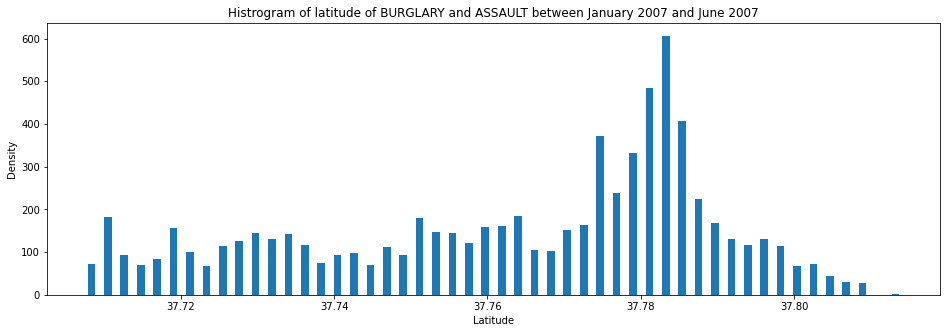

In [11]:
# 2. A histogram for the latitude of the categories 'BURGLARY' and 'ASSAULT', between January and June of 2007
startdate = datetime(2007,1,1)
enddate = datetime(2007,6,1)
crime1 = focuscrimes[4]
crime2 = focuscrimes[5]

filtered_crime_data = data[(data['DateTime'] < enddate) & (data['DateTime'] > startdate) & ((data['Category'] == crime1) | (data['Category'] == crime2))]

hist = np.histogram(filtered_crime_data['Y'], bins = 50)

plt.figure(figsize = (16,5))
plt.title('Histrogram of latitude of ' + crime1 + ' and ' + crime2 +' between ' + datetime.strftime(startdate,'%B %Y') + ' and ' + datetime.strftime(enddate ,'%B %Y'))
plt.bar(hist[1][0:(len(hist[1])-1)], hist[0],width = 0.001)
plt.xlabel('Latitude')
plt.ylabel('Density')
plt.show()

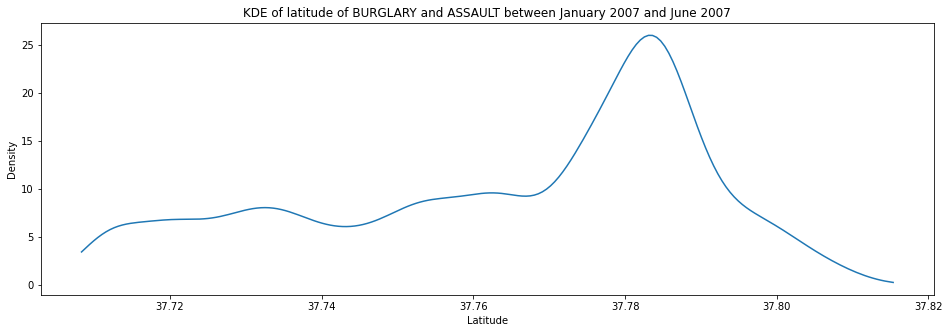

In [12]:
# 3. Kernel density estimation for the latitude of the categories 'BURGLARY' and 'ASSAULT', between January and June of 2007
density = gaussian_kde(filtered_crime_data['Y'])
density.covariance_factor = lambda : 0.15 # Degree of smoothing of the curve
density._compute_covariance()

xs = np.linspace(np.min(hist[1]), np.max(hist[1]), 200)

plt.figure(figsize = (16,5))
plt.title('KDE of latitude of ' + crime1 + ' and ' + crime2 +' between ' + datetime.strftime(startdate,'%B %Y') + ' and ' + datetime.strftime(enddate ,'%B %Y'))
plt.plot(xs, density(xs))
plt.xlabel('Latitude')
plt.ylabel('Density')
plt.show()

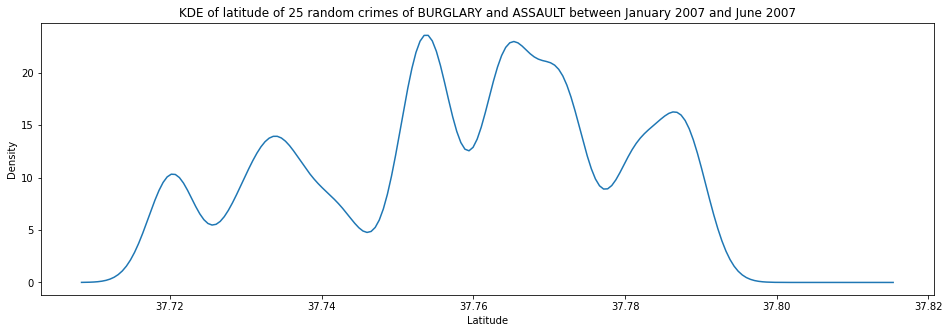

In [13]:
# 3. Kernel density estimation for the latitude of 25 random picks of the categories 'BURGLARY' and 'ASSAULT', between January and June of 2007.
filtered_crime_data = filtered_crime_data.reset_index(drop = True)
random.shuffle(filtered_crime_data['Y']) # Shuffling of the data

density1 = gaussian_kde(filtered_crime_data['Y'][:25]) # Picking the first 25 rows
density1.covariance_factor = lambda : 0.15 # Degree of smoothing of the curve
density1._compute_covariance()

xs = np.linspace(np.min(hist[1]), np.max(hist[1]), 200)
plt.figure(figsize = (16,5))
plt.plot(xs, density1(xs))
plt.xlabel('Latitude')
plt.ylabel('Density')
plt.title('KDE of latitude of 25 random crimes of ' + crime1 + ' and ' + crime2 +' between ' + datetime.strftime(startdate,'%B %Y') + ' and ' + datetime.strftime(enddate ,'%B %Y'))
plt.show()

We think that it doesn't shed light on why KDEs can be misleading because the sample is too small to represent the whole dataset and randomly chosen, so we would encounter differences even in a regular histogram.

# Part 4: Heatmaps of geo-data

Exercise: A new take on geospatial data using Folium (see the Week 4 exercises for full info and tutorials).

Now we look at studying geospatial data by plotting raw data points as well as heatmaps on top of actual maps.

1. First start by plotting a map of San Francisco with a nice tight zoom. Simply use the command folium.Map([lat, lon], zoom_start=13), where you'll have to look up San Francisco's longitude and latitude.

2. Next, use the the coordinates for SF City Hall 37.77919, -122.41914 to indicate its location on the map with a nice, pop-up enabled maker. (In the screenshot below, I used the black & white Stamen tiles, because they look cool).

3. Now, let's plot some more data (no need for popups this time). Select a couple of months of data for 'DRUG/NARCOTIC' and draw a little dot for each arrest for those two months. You could, for example, choose June-July 2016, but you can choose anything you like - the main concern is to not have too many points as this uses a lot of memory and makes Folium behave non-optimally. We can call this a kind of visualization a point scatter plot.

4. Next, let's play with heatmaps. You can figure out the appropriate commands by grabbing code from the main tutorial) and modifying to suit your needs.
  * To create your first heatmap, grab all arrests for the category 'SEX OFFENSES, NON FORCIBLE' across all time. Play with parameters to get plots you like.
   * Now, comment on the differences between scatter plots and heatmaps.
What can you see using the scatter-plots that you can't see using the heatmaps? And vice versa: what does the heatmaps help you see that's difficult to distinguish in the scatter-plots?

 * Play around with the various parameter for heatmaps. You can find a list here: https://python-visualization.github.io/folium/plugins.html
Comment on the effect on the various parameters for the heatmaps. How do they change the picture? (at least talk about the radius and max_zoom). For one combination of settings, my heatmap plot looks like this.

 * Comment on the effect on the various parameters for the heatmaps. How do they change the picture? (at least talk about the radius and max_zoom). For one combination of settings, my heatmap plot looks like this.
 * In that screenshot, I've (manually) highlighted a specific hotspot for this type of crime. Use your detective skills to find out what's going on in that building on the 800 block of Bryant street ... and explain in your own words.

**Exercise:** Heat map movies. This exercise is a bit more independent than above - you get to make all the choices.

5. Start by choosing your favorite crimetype. Prefereably one with spatial patterns that change over time (use your data-exploration from the previous lectures to choose a good one).
Now, choose a time-resolution. You could plot daily, weekly, monthly datasets to plot in your movie. Again the goal is to find interesting temporal patterns to display. We want at least 20 frames though.
Create the movie using HeatMapWithTime.

6. Comment on your results:
What patterns does your movie reveal?
Motivate/explain the reasoning behind your choice of crimetype and time-resolution.

In [14]:
#1 Map of SF
startlat = 37.77919
startlon = -122.41914
map_hooray = folium.Map(location=[startlat, startlon], zoom_start = 13, tiles = 'Stamen Toner')
map_hooray # Calls the map to display

In [15]:
# 2. Adding a marker
folium.Marker([37.77919, -122.41914], popup='City Hall',icon=folium.Icon(color='blue')).add_to(map_hooray)
map_hooray # Calls the map to display

In [16]:
#3. Adding a marker on the location of events of 'DRUG/NARCOTIC' in June 2016
data_drug_cat = data[data.Category == focuscrimes[7]]

date1 = datetime(2016, 6, 1)
date2 = datetime(2016, 7, 1)
data_drug_cat_2016_06_07 = data_drug_cat.loc[(data_drug_cat['DateTime']>date1) & (data_drug_cat['DateTime']<date2)] #Filtering data that is between 'date1' and 'date2'

data_drug_cat_2016_06_07 = data_drug_cat_2016_06_07.reset_index(drop = True)

map_hooray2 = folium.Map(location=[startlat, startlon], zoom_start = 13, tiles = 'Stamen Toner')
map_hooray2 # Calls the map to display

latti = data_drug_cat_2016_06_07['Y']; longi = data_drug_cat_2016_06_07['X']; #Location
addr = data_drug_cat_2016_06_07['Address'] #Pop up marker label


for i in range(len(latti)):
    folium.CircleMarker([latti[i], longi[i]], radius = 10, popup = addr[i], color = 'red').add_to(map_hooray2)
map_hooray2

In [17]:
# 4. Heatmap of SEX OFFENCES, NON FORCIBLE 
data1 = data[['Category', 'X','Y']]
filtered=data1[data1['Category']=='SEX OFFENSES, NON FORCIBLE']
heatData=[[filtered['Y'].iloc[x],filtered['X'].iloc[x]] for x in range(0,len(filtered))]


map_hooray2 = folium.Map(location=[startlat, startlon], zoom_start = 13, tiles = 'Stamen Toner')
HeatMap(heatData, radius = 25, blur = 20).add_to(map_hooray2)
map_hooray2

4. 
*   On scatter plot the exact position of an observation can be precisely pointed out. While on a heatmap it is easier to identify the density of events in a certain location.
*   The *radius* affects the size of the circle that represents each data point. While *max_zoom* sets the zoom level at which the intensity of each tile is maxed out. Another parameter is *blur*, which sets how blurred the edge of each of the data point's circle is.
* Our guess is that when crimes don't have a specified location, then they are loaded into the dataset as if the were reported in the Hall of Justice.

In [18]:
# 5. Heat map movie of the crime PROSTITUTION for each week averaged across all years
filtered=data[data['Category']=='PROSTITUTION']
weeks=filtered[['Week','X','Y']]
allw=[]

for x in range(1,54): # Adds all PROSTITUTION crimes of all the years for each week of each year
    w=weeks[weeks.Week==x][['Y','X']]
    wi=[[w['Y'].iloc[y],w['X'].iloc[y]] for y in range(0,len(w))]
    allw.append(wi)

#Radius and maxzoom
map_hooray3 = folium.Map(location=[startlat, startlon], tiles="Stamen Toner", zoom_start = 13)

# Display the map

hm = plugins.HeatMapWithTime(allw,auto_play=True,max_opacity=0.8)
hm.add_to(map_hooray3)
# Display the map
map_hooray3

6. 
* It seems like the location of the crime we chose (Prostitution) doesn't change over the year, except during the last week of the year where there is a cosiderable decrease in crime events.
* We chose prostitution because we thought it might be concentrated on specific points around the city. The time resolution was chose to get an overview of the weekly trend over the year for all of the years.

# Part 5: Errors in the data. The importance of looking at raw (or close to raw) data.

We started the course by plotting simple histogram plots that showed a lot of cool patterns. But sometimes the binning can hide imprecision, irregularity, and simple errors in the data that could be misleading. In the work we've done so far, we've already come across at least three examples of this in the SF data.

In the hourly activity for PROSTITUTION something surprising is going on on Thursday. Remind yourself here, where I've highlighted the phenomenon I'm talking about.

When we investigated the details of how the timestamps are recorded using jitter-plots, we saw that many more crimes were recorded e.g. on the hour, 15 minutes past the hour, and to a lesser in whole increments of 10 minutes. 
Crimes didn't appear to be recorded as frequently in between those round numbers. Remind yourself here, where I've highlighted the phenomenon I'm talking about.

And finally, today we saw that the Hall of Justice seemed to be an unlikely hotspot for sex offences. Remind yourself here.

**Exercise:** Data errors. The data errors we discovered above become difficult to notice when we aggregate data (and when we calculate mean values, as well as statistics more generally). Thus, when we visualize, errors become difficult to notice when when we bin the data. We explore this process in the exercise below.

This last exercise for today has two parts.
1. In each of the three examples above, describe in your own words how the data-errors I call attention to above can bias the binned versions of the data. Also briefly mention how not noticing these errors can result in misconceptions about the underlying patterns of what's going on in San Francisco (and our modeling).

2. (Optional) Find your own example of human noise in the data and visualize it.

1. 
 *  The spike in prostitution means that there are alot of data points with the exact same time value which seems unlikely compared to the other days of the week. When plotting the binned version this would make us believe that prositituion occurs most oftenly in a certain hour in the middle of the week.
  * If we would plot the bins it wouldn't represent the real world events because the reported time has been altered by the reporter and would lead us to believe to that the crimes follow a certain schedule.
  * We believe that the crimes were reported to have happened in the Hall of Justice because of a lack of the real location. This would make it seem like the Hall of Justice is a hotspot for prostitution when it's probably not.

2.   List item

